**Machine Learning (IE403)** 

Lukhi Krunalkumar (201901449)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
X_train = np.random.rand(50,1)
Y_train = np.sin(2*np.pi*X_train) + np.random.normal(0,0.25,size=(50,1))
Y_train_mean = np.sin(2*np.pi*X_train)
X_test = np.random.rand(100,1)
Y_test = np.sin(2*np.pi*X_test) + np.random.normal(0,0.25,size=(100,1))
Y_test_mean = np.sin(2*np.pi*X_test)

In [ ]:
def loss(Y,Y_pred):
  loss = np.mean((Y-Y_pred)**2)
  return loss

def gradient(X,Y,Y_pred):
  m = X.shape[0]
  dw = (1/m)*np.dot(X.T, (Y_pred - Y))
  db = (1/m)*np.sum((Y_pred - Y)) 
  return dw,db

def transform(X,deg):

  t=X.copy();

  for i in range(deg+1):
    X = np.append(X, t**i, axis=1)
  
  return X

In [ ]:
def Regression(X,Y,deg,itr,lr):
  X=transform(X,deg)
  m,n=X.shape

  w=np.zeros((n,1))
  b=0

  Y=Y.reshape(m,1)

  ls=[]

  for i in range(itr):
      Y_pred=np.dot(X,w)+b

      dw,db=gradient(X,Y,Y_pred)
      w-=dw*lr
      b-=db*lr
      l=loss(Y,np.dot(X,w)+b)
      ls.append(l)

  return w,b,ls

def predict(X,w,b,deg):
  xt=transform(X,deg)
  return np.dot(xt,w)+b


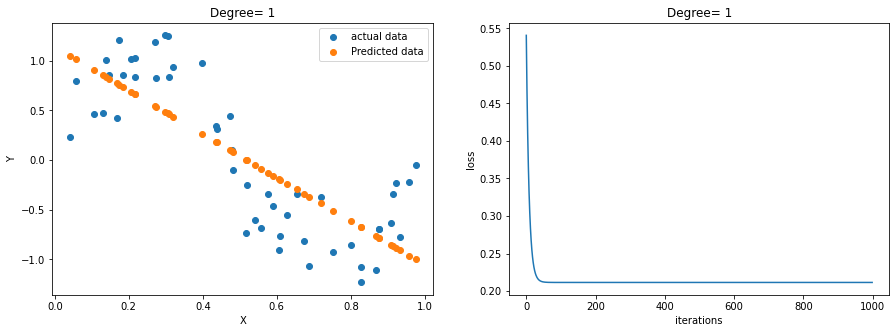



coefficients: [[-0.52703787]
 [ 1.14053071]
 [-0.52703787]]




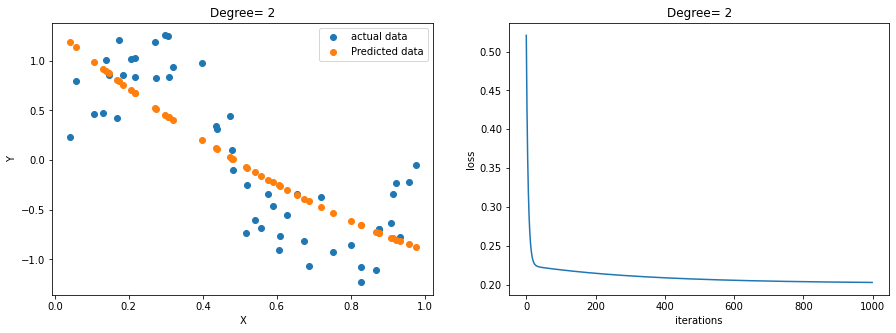



coefficients: [[-0.92013924]
 [ 1.31263405]
 [-0.92013924]
 [ 1.59210637]]




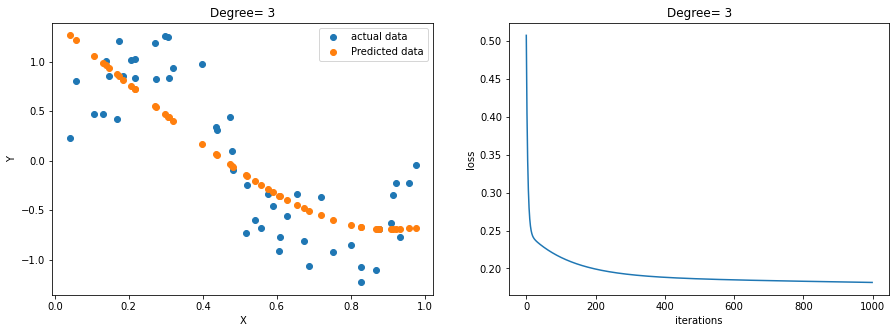



coefficients: [[-0.77286194]
 [ 1.38522962]
 [-0.77286194]
 [-0.41204765]
 [ 2.68438113]]




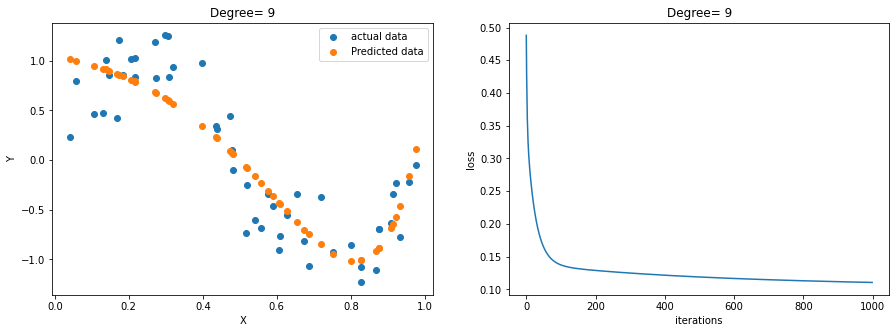



coefficients: [[ 0.21075093]
 [ 1.04359345]
 [ 0.21075093]
 [-1.64006705]
 [-1.03435501]
 [-0.03467684]
 [ 0.74991159]
 [ 1.25843061]
 [ 1.5551777 ]
 [ 1.7103378 ]
 [ 1.77592856]]




In [ ]:
deg=[1,2,3,9]
itr=1000
lr=0.5
for d in deg:
  w,b,l=Regression(X_train,Y_train,d,itr,lr)

  plt.subplots(figsize=(15, 5))

  plt.subplot(1,2,1)
  plt.scatter(X_train,Y_train)
  plt.scatter(X_train,predict(X_train,w,b,d))
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend(["actual data","Predicted data"])
  plt.title("Degree= {}".format(d))
  
  plt.subplot(1,2,2)
  plt.plot(range(itr),l)
  plt.xlabel("iterations")
  plt.ylabel("loss")
  plt.title("Degree= {}".format(d))
  plt.show()
  print("\n")
  print("coefficients:",b+w)

  print("\n")


In [ ]:
for d in deg:
  w,b,l=Regression(X_test,Y_test,d,itr,lr)
  Y_pred=predict(X_test,w,b,d)
  RMSE=np.sqrt(np.mean((Y_test-Y_pred)**2))
  print("Degree=",d, "RMSE = ",RMSE)

Degree= 1 RMSE =  0.5430470088440121
Degree= 2 RMSE =  0.5413737449330108
Degree= 3 RMSE =  0.5202532218832349
Degree= 9 RMSE =  0.39507846956271797


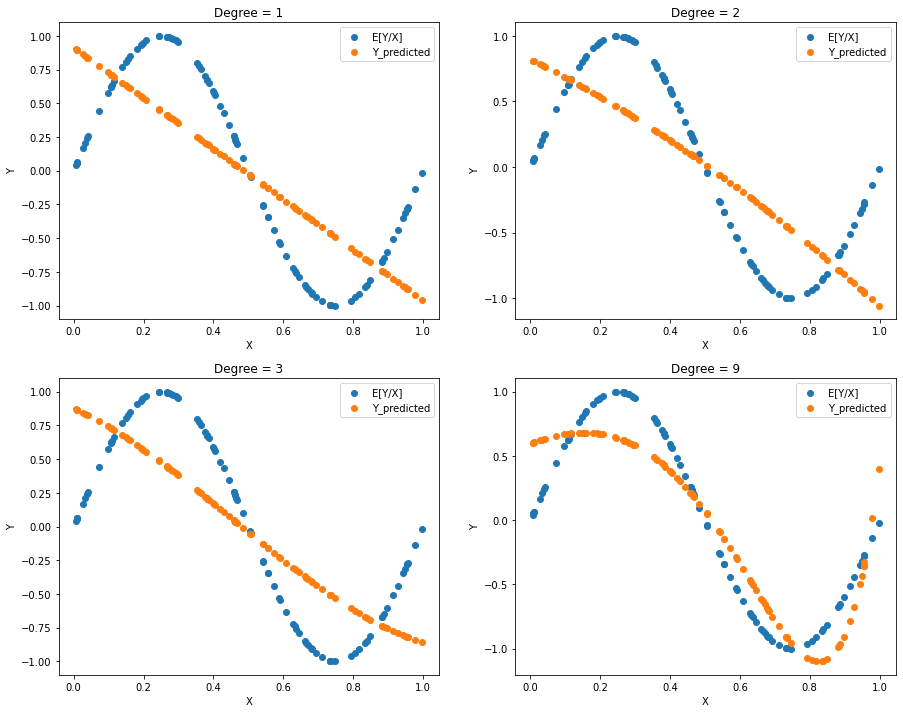

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,12))
w,b,l=Regression(X_test,Y_test,deg[0],itr,lr)
axs[0, 0].scatter(X_test,Y_test_mean)
axs[0, 0].scatter(X_test,predict(X_test,w,b,deg[0]))
axs[0, 0].set_title('Degree = 1')

w,b,l=Regression(X_test,Y_test,deg[1],itr,lr)
axs[0, 1].scatter(X_test, Y_test_mean)
axs[0, 1].scatter(X_test,predict(X_test,w,b,deg[1]))
axs[0, 1].set_title('Degree = 2')

w,b,l=Regression(X_test,Y_test,deg[2],itr,lr)
axs[1, 0].scatter(X_test, Y_test_mean)
axs[1, 0].scatter(X_test,predict(X_test,w,b,deg[2]))
axs[1, 0].set_title('Degree = 3')

w,b,l=Regression(X_test,Y_test,deg[3],itr,lr)
axs[1, 1].scatter(X_test, Y_test_mean)
axs[1, 1].scatter(X_test,predict(X_test,w,b,deg[3]))
axs[1, 1].set_title('Degree = 9')

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    ax.legend(["E[Y/X]","Y_predicted"])

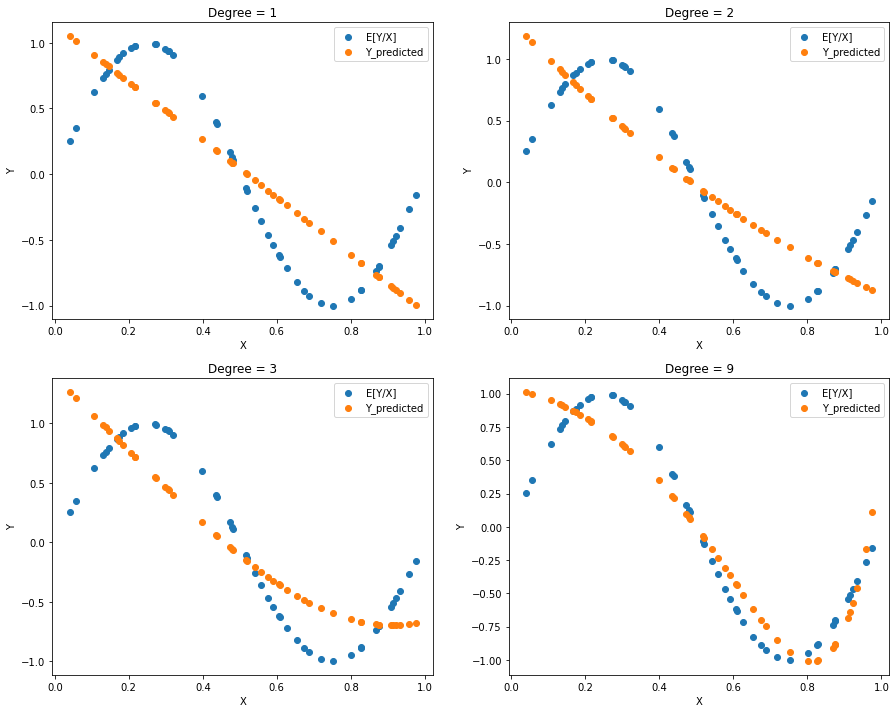

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,12))
w,b,l=Regression(X_train,Y_train,deg[0],itr,lr)
axs[0, 0].scatter(X_train,Y_train_mean)
axs[0, 0].scatter(X_train,predict(X_train,w,b,deg[0]))
axs[0, 0].set_title('Degree = 1')

w,b,l=Regression(X_train,Y_train,deg[1],itr,lr)
axs[0, 1].scatter(X_train, Y_train_mean)
axs[0, 1].scatter(X_train,predict(X_train,w,b,deg[1]))
axs[0, 1].set_title('Degree = 2')

w,b,l=Regression(X_train,Y_train,deg[2],itr,lr)
axs[1, 0].scatter(X_train, Y_train_mean)
axs[1, 0].scatter(X_train,predict(X_train,w,b,deg[2]))
axs[1, 0].set_title('Degree = 3')

w,b,l=Regression(X_train,Y_train,deg[3],itr,lr)
axs[1, 1].scatter(X_train, Y_train_mean)
axs[1, 1].scatter(X_train,predict(X_train,w,b,deg[3]))
axs[1, 1].set_title('Degree = 9')

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')
    ax.legend(["E[Y/X]","Y_predicted"])


**Observations:**


1.   As degree increases we get better fit. This behaviour is observed until a specific value. Aster this specific value, we observe over fitting.
2.   RMSE decreases as degree increases upto specfic value. Then RMSE statrs to increase due to overfitting. 
3.   When degree is higher, regression model tries to capture noise. This leads to sudden fluctuations in fit plot. This is called ovefitting. So, we observe higher value of RMSE in this case.
4. For the given problem, when degree is ghigher than 55, overfitting starts. 